In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA

In [2]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.columns = df.columns.str.lower()
df.index.name = 'id'
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# columns with NA
df.isnull().sum().to_frame()

,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0
cabin,687


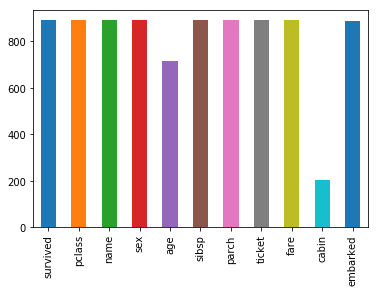

In [6]:
df.notnull().sum().plot(kind='bar')

In [7]:
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [8]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

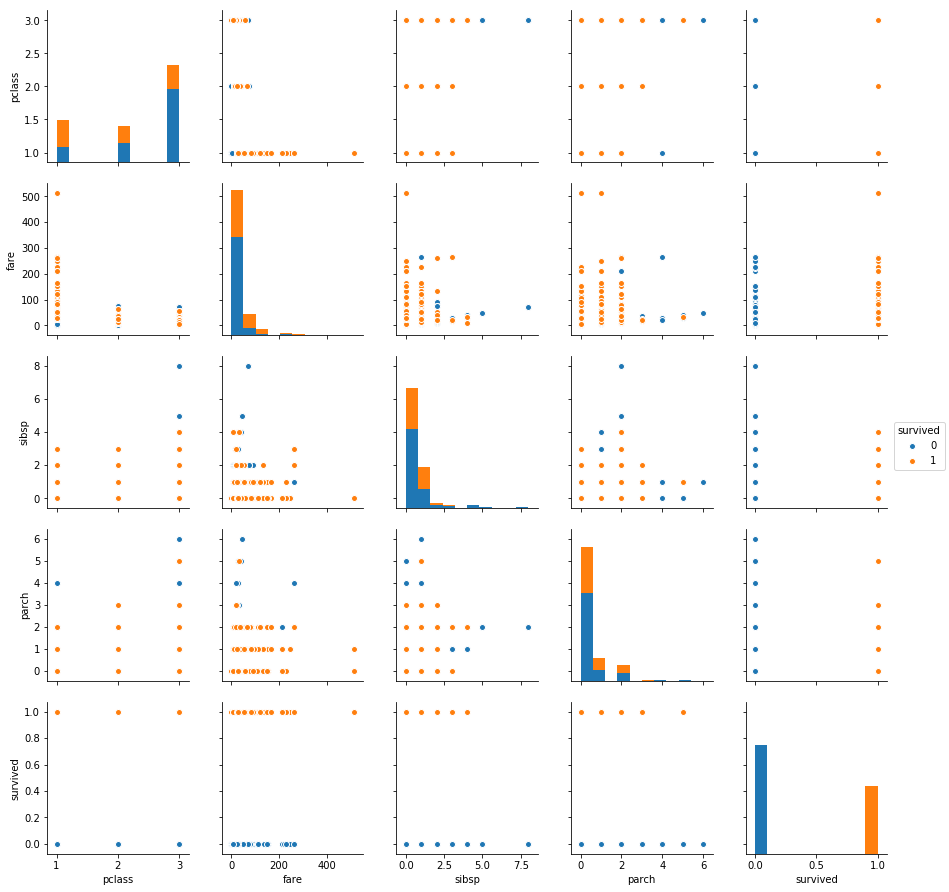

In [9]:
sns.pairplot(df[['pclass', 'sex', 'fare', 'sibsp', 'parch', 'survived']], hue='survived')

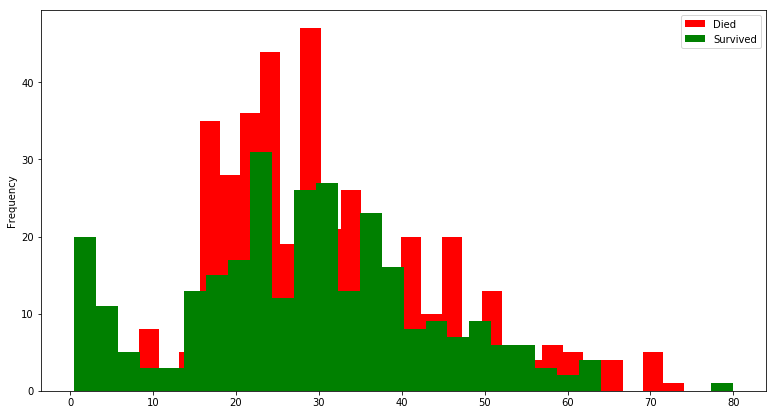

In [10]:
plt.figure(figsize=(13,7))
df[df['survived']==0]['age'].plot(bins=30, kind='hist', label='Died', color='red') 
df[df['survived']==1]['age'].plot(bins=30, kind='hist', label='Survived', color='green') 
plt.legend()

## Transform

In [11]:
df2 = df.copy()

### Missing Age

In [12]:
df2['age'].head(10)

id
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: age, dtype: float64

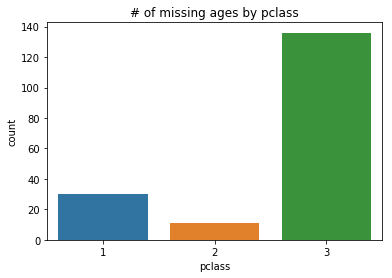

In [13]:
sns.countplot(x=df2[df2['age'].isnull()]['pclass'])
plt.title('# of missing ages by pclass')
plt.show()

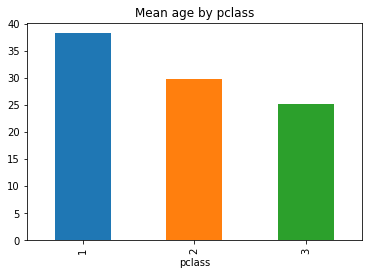

In [14]:
mean_ages_by_pclass = df2.groupby('pclass')['age'].mean()
mean_ages_by_pclass.plot(kind='bar', title='Mean age by pclass')

In [15]:
mean_ages_by_pclass

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [16]:
def update_age(row):
    if np.isnan(row['age']):
        return mean_ages_by_pclass[row['pclass']]
    else:
        return row['age']
    
df2['age'] = df2.apply(update_age, axis=1)

In [17]:
df2.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S


### Fare (missing on Test set)

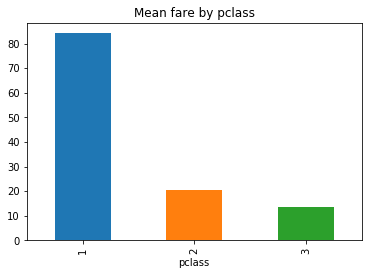

In [48]:
mean_fare_by_pclass = df2.groupby('pclass')['fare'].mean()
mean_fare_by_pclass.plot(kind='bar', title='Mean fare by pclass')

In [50]:
def impute_fare(row):
    if np.isnan(row['fare']):
        return mean_fare_by_pclass[row['pclass']]
    else:
        return row['fare']
    
df2['fare'] = df2.apply(impute_fare, axis=1)

### Mising Embarked

In [18]:
df2[df2['embarked'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
df2 = pd.get_dummies(df2, columns=['embarked'])

In [20]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Categorical Sex

In [21]:
df2['female'] = ((df2['sex'] == 'female') * 1)

In [22]:
df2.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked_C', 'embarked_Q', 'embarked_S', 'female'],
      dtype='object')

In [23]:
# X = df[[ 'female', 'pclass', 'fare', 'sibsp', 'parch' ]]

features = [ 'female', 'pclass', 'fare', 'age', 'sibsp', 'parch', 'embarked_C', 'embarked_Q', 'embarked_S' ]
target = 'survived' 
cols = features + [ target ]

final_df = df2[cols]
X = df2[features]
y = df2[target]

## Classifiers Evaluation

In [24]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import train_test_split

def classifier_accuracy(classifier, X, y):    
    accuracies = []
    
    for train_index, test_index in RepeatedKFold(n_splits=5, n_repeats=5).split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = classifier().fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        accuracies.append((y_pred == y_test).sum() / len(y_test))

    return np.mean(accuracies)

In [25]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [ LogisticRegression, SVC, GradientBoostingClassifier, DecisionTreeClassifier, RandomForestClassifier ]

for classifier in classifiers:
    start_time = time.time()
    accuracy = classifier_accuracy(classifier, X, y)
    end_time = time.time()
    
    duration = end_time - start_time
    print("{}%  {}s  {}".format(round(accuracy*100,1), round(duration,2), classifier.__name__))

80.1%  0.07s  LogisticRegression
70.1%  0.47s  SVC
82.7%  1.57s  GradientBoostingClassifier
78.2%  0.06s  DecisionTreeClassifier
80.6%  0.37s  RandomForestClassifier


## Tune GradientBoosting

In [26]:
from sklearn.model_selection import GridSearchCV 
from sklearn import cross_validation, metrics

/Users/rgabillet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Model Report
Accuracy : 0.9001
AUC Score (Train): 0.950234
CV Score : Mean - 0.8708284 | Std - 0.03099381 | Min - 0.820751 | Max - 0.908864


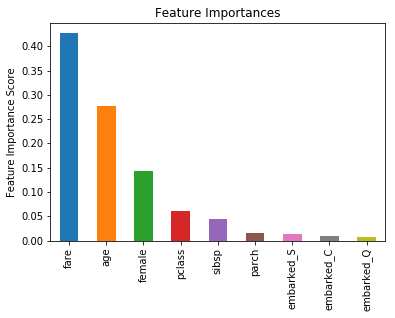

In [27]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    target = 'survived'

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


# Step 1
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, final_df, features)


In [29]:
# Step 2

target = 'survived'

param_test1 = {'n_estimators':range(20,200,5)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(final_df[features], final_df[target])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/rgabillet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83737, std: 0.01713, params: {'n_estimators': 20},
  mean: 0.83828, std: 0.01695, params: {'n_estimators': 25},
  mean: 0.83847, std: 0.01695, params: {'n_estimators': 30},
  mean: 0.84023, std: 0.01585, params: {'n_estimators': 35},
  mean: 0.84124, std: 0.01915, params: {'n_estimators': 40},
  mean: 0.84085, std: 0.01936, params: {'n_estimators': 45},
  mean: 0.84266, std: 0.01703, params: {'n_estimators': 50},
  mean: 0.84412, std: 0.01626, params: {'n_estimators': 55},
  mean: 0.84518, std: 0.01800, params: {'n_estimators': 60},
  mean: 0.84541, std: 0.01889, params: {'n_estimators': 65},
  mean: 0.84541, std: 0.01906, params: {'n_estimators': 70},
  mean: 0.84621, std: 0.01899, params: {'n_estimators': 75},
  mean: 0.84730, std: 0.02003, params: {'n_estimators': 80},
  mean: 0.84768, std: 0.01962, params: {'n_estimators': 85},
  mean: 0.84893, std: 0.02074, params: {'n_estimators': 90},
  mean: 0.84917, std: 0.02061, params: {'n_estimators': 95},
  mean: 0.84918, std: 0.

In [30]:
# Step 3

param_test2 = {'max_depth':range(8,18,1),
               'min_samples_split':range(120,280,20)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=165, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(final_df[features],df[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



/Users/rgabillet/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.87640, std: 0.03539, params: {'max_depth': 8, 'min_samples_split': 120},
  mean: 0.87550, std: 0.03414, params: {'max_depth': 8, 'min_samples_split': 140},
  mean: 0.87527, std: 0.03179, params: {'max_depth': 8, 'min_samples_split': 160},
  mean: 0.87643, std: 0.03561, params: {'max_depth': 8, 'min_samples_split': 180},
  mean: 0.87367, std: 0.03489, params: {'max_depth': 8, 'min_samples_split': 200},
  mean: 0.87325, std: 0.03475, params: {'max_depth': 8, 'min_samples_split': 220},
  mean: 0.87433, std: 0.03271, params: {'max_depth': 8, 'min_samples_split': 240},
  mean: 0.87575, std: 0.03100, params: {'max_depth': 8, 'min_samples_split': 260},
  mean: 0.87516, std: 0.03779, params: {'max_depth': 9, 'min_samples_split': 120},
  mean: 0.87536, std: 0.03068, params: {'max_depth': 9, 'min_samples_split': 140},
  mean: 0.87811, std: 0.03405, params: {'max_depth': 9, 'min_samples_split': 160},
  mean: 0.87430, std: 0.03581, params: {'max_depth': 9, 'min_samples_split': 180},
  me


Model Report
Accuracy : 0.899
AUC Score (Train): 0.962281
CV Score : Mean - 0.8781295 | Std - 0.03302969 | Min - 0.8229249 | Max - 0.9202644


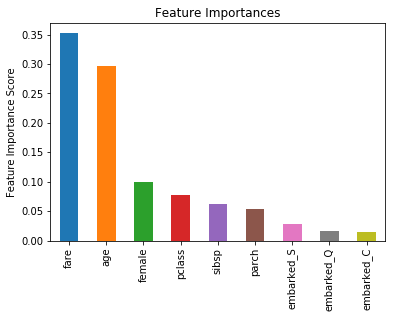

In [31]:
final_model = gsearch2
modelfit(final_model.best_estimator_, final_df, features)

# Submission

In [32]:
!head test.csv

In [33]:
test_df = pd.read_csv('test.csv', index_col='PassengerId')
test_df.columns = test_df.columns.str.lower()
test_df.index.name = 'id'
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Fix Age

In [34]:
def update_age(row):
    if np.isnan(row['age']):
        return mean_ages_by_pclass[row['pclass']]
    else:
        return row['age']
    
test_df['age'] = test_df.apply(update_age, axis=1)

#### Fix Embarked

In [35]:
test_df = pd.get_dummies(test_df, columns=['embarked'])

#### Fix Fare

In [62]:
def impute_fare(row):
    if np.isnan(row['fare']):
        return mean_fare_by_pclass[row['pclass']]
    else:
        return row['fare']
    
test_df['fare'] = test_df.apply(impute_fare, axis=1)

#### Fix Sex

In [63]:
test_df['female'] = ((test_df['sex'] == 'female') * 1)

#### Select Features

In [64]:
features = [ 'female', 'pclass', 'fare', 'age', 'sibsp', 'parch', 'embarked_C', 'embarked_Q', 'embarked_S' ]
X_test = test_df[features]
X_test.head()

,female,pclass,fare,age,sibsp,parch,embarked_C,embarked_Q,embarked_S
id,,,,,,,,,
892,0,3,7.8292,34.5,0,0,0,1,0
893,1,3,7.0000,47.0,1,0,0,0,1
894,0,2,9.6875,62.0,0,0,0,1,0
895,0,3,8.6625,27.0,0,0,0,0,1
896,1,3,12.2875,22.0,1,1,0,0,1


In [70]:
y_pred = final_model.predict(X_test)

In [75]:
!head gender_submission.csv

In [74]:
submission_df = pd.DataFrame({ 'PassengerId': X_test.index, 'Survived': y_pred }).set_index('PassengerId')
submission_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [76]:
submission_df.to_csv('remi_submission.csv')

In [77]:
submission_df['Survived'].value_counts()

0    281
1    137
Name: Survived, dtype: int64